<a href="https://colab.research.google.com/github/MinakoNG63/DSFB/blob/main/15_Feature_Selection_By_Filter_Wrapper_Embeded_Approaches_63070240.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Selection: Three Common Techniques for Feature Selection

Term 1 2022 - Instructor: Teerapong Leelanupab

Teaching Assistant:
1. Piyawat Chuangkrud (Sam)
2. Suvapat Manu (Mint)

***

Credit: Abhini Shetye, [Feature Selection with sklearn and Pandas](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)
***

In [ ]:
#---------------------------------
#download files จาก google drive
#---------------------------------

#dataurl = https://drive.google.com/file/d/1W-4l7mixel4-WQhbYuGdge2RGKsOsGKH/view?usp=sharing
#download Housing_dataset.csv
!gdown --id 1W-4l7mixel4-WQhbYuGdge2RGKsOsGKH

#dataurl = 'https://drive.google.com/file/d/14RfRbjtuf-YmDFdeXI5dH6gM4jysbP4w/view?usp=sharing'
#download mobile-price-classification.zip
# You can download the dataset from here https://www.kaggle.com/iabhishekofficial/mobile-price-classification#train.csv
!gdown --id 14RfRbjtuf-YmDFdeXI5dH6gM4jysbP4w

!unzip mobile-price-classification.zip

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1W-4l7mixel4-WQhbYuGdge2RGKsOsGKH
To: /content/Housing_dataset.csv
100% 17.6k/17.6k [00:00<00:00, 17.3MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=14RfRbjtuf-YmDFdeXI5dH6gM4jysbP4w
To: /content/mobile-price-classification.zip
100% 70.5k/70.5k [00:00<00:00, 66.8MB/s]
Archive:  mobile-price-classification.zip
  inflating: mobile_test.csv         
  inflating: description.txt         
  inflating: mobile_train.csv        


**Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model.** A feature in case of a dataset simply means a column. When we get any dataset, not necessarily every column (feature) is going to have an impact on the output variable. If we add these irrelevant features in the model, it will just make the model worst (Garbage In Garbage Out). This gives rise to the need of doing feature selection.

The data features that you use to train your machine learning models have a huge influence on the performance you can achieve. Irrelevant or partially relevant features can negatively impact model performance.

Feature selection and Data cleaning should be the first and most important step of your model designing.

In this notebook, you will discover feature selection techniques that you can use in Machine Learning.

Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.

Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

**How to select features and what are Benefits of performing feature selection before modeling your data?**
* **Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.
* **Improves Accuracy**: Less misleading data means modeling accuracy improves.
* **Reduces Training Time**: fewer data points reduce algorithm complexity and algorithms train faster.


Bacially, there are 3 common categories of feature selection:
1. **Filter Method**
2. **Wrapper Method**
3. **Embedded Method**

In [ ]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import warnings
warnings.filterwarnings('ignore')

### About the dataset:
We will be using the built-in Boston Housing dataset which can be loaded through sklearn. We will be selecting features using the above listed methods for the **regression problem** of predicting the “*MEDV*” column. In the following code snippet, we will import all the required libraries and load the dataset.

The dataset is about housing in the area of Boston Mass.
[https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

There are 14 attributes in each case of the dataset. They are:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*  NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per $\$$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $\$$1000's

In [ ]:
#Loading the dataset
boston_data = load_boston() # x is an object of sklearn.utils.Bunch, we will convert it into a common dataframe
type(boston_data)

sklearn.utils.Bunch

In [ ]:
df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names) # create a dataframe object, called "df", by copying the .data members to it.
df["MEDV"] = boston_data.target # We then copy the .target member for a supervised problem to it.
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 1. Filter Method:

As the name suggest, in this method, you filter and take only the subset of the relevant features. The model is built after selecting the features. The filtering here is done using correlation matrix and it is most commonly done using <font color='red'>*Pearson correlation*, $R$.</font>

Here we will first plot the Pearson correlation **heatmap** and see the correlation of independent variables with the output variable MEDV. We will only select features which has correlation of above 0.5 (taking absolute value) with the output variable.
The correlation coefficient has values between -1 to 1
- A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
- A value closer to 1 implies stronger positive correlation
- A value closer to -1 implies stronger negative correlation

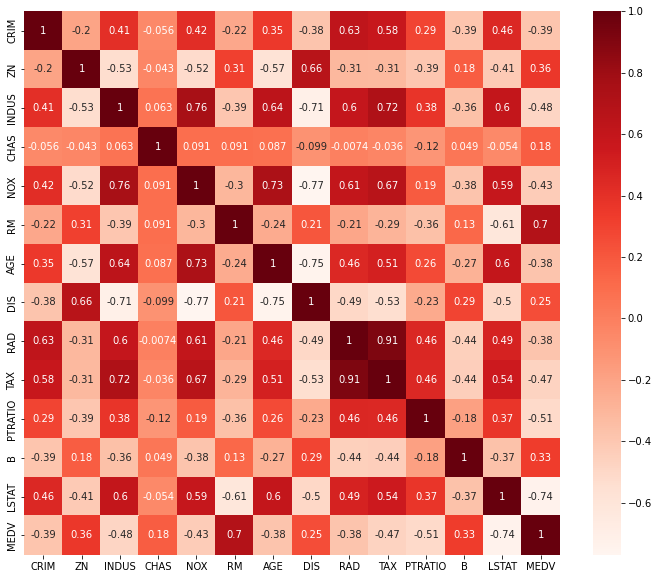

In [ ]:
#Using Pearson Correlation
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
plt.figure(figsize=(12,10))
cor = df.corr(method='pearson') #‘kendall’, ‘spearman’
#plot heat map
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

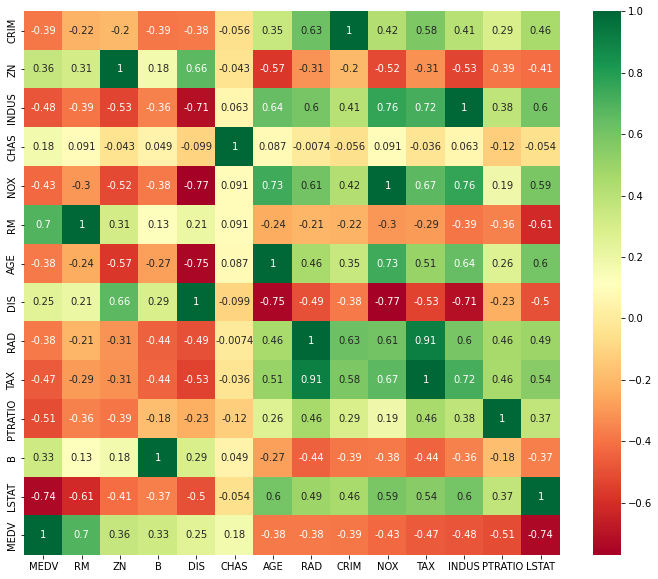

In [ ]:
# we can sort the heatmap according to correlation
plt.figure(figsize=(12,10))
#plot heat map
sns.heatmap(cor.sort_values(by=['MEDV'], axis=1, ascending=False),
            cmap='RdYlGn',
            annot=True)
plt.show()

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
# Convert correlation matrix to 1-D Series and sort
sorted_mat = cor.unstack().sort_values()
sorted_mat

NOX      DIS       -0.769230
DIS      NOX       -0.769230
         AGE       -0.747881
AGE      DIS       -0.747881
LSTAT    MEDV      -0.737663
MEDV     LSTAT     -0.737663
INDUS    DIS       -0.708027
DIS      INDUS     -0.708027
RM       LSTAT     -0.613808
LSTAT    RM        -0.613808
ZN       AGE       -0.569537
AGE      ZN        -0.569537
TAX      DIS       -0.534432
DIS      TAX       -0.534432
INDUS    ZN        -0.533828
ZN       INDUS     -0.533828
         NOX       -0.516604
NOX      ZN        -0.516604
PTRATIO  MEDV      -0.507787
MEDV     PTRATIO   -0.507787
LSTAT    DIS       -0.496996
DIS      LSTAT     -0.496996
RAD      DIS       -0.494588
DIS      RAD       -0.494588
MEDV     INDUS     -0.483725
INDUS    MEDV      -0.483725
TAX      MEDV      -0.468536
MEDV     TAX       -0.468536
B        RAD       -0.444413
RAD      B         -0.444413
B        TAX       -0.441808
TAX      B         -0.441808
NOX      MEDV      -0.427321
MEDV     NOX       -0.427321
LSTAT    ZN   

We are interested in only features which has correlation of <font color='blue'>above +-0.5 </font> (taking absolute value) with the output variable.

In [ ]:
#Correlation with output variable
cor_target = abs(cor["MEDV"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

As we can see, only the features:
* RM,
* PTRATIO and
* LSTAT

are highly correlated with the output variable MEDV. Hence we will drop all other features apart from these. However this is not the end of the process. **One of the assumptions of linear regression is that the independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest.** So let us check the correlation of selected features with each other. This can be done either by visually checking it from the above correlation matrix or from the code snippet below.

In [ ]:
print(df[["RM","PTRATIO"]].corr())
print("\n")
print(df[["LSTAT","PTRATIO"]].corr())
print("\n")
print(df[["RM","LSTAT"]].corr())

               RM   PTRATIO
RM       1.000000 -0.355501
PTRATIO -0.355501  1.000000


            LSTAT   PTRATIO
LSTAT    1.000000  0.374044
PTRATIO  0.374044  1.000000


             RM     LSTAT
RM     1.000000 -0.613808
LSTAT -0.613808  1.000000


As we can seen above, `the variables RM and LSTAT are highly correlated with each other (-0.613808)`. This issue is also called <font color='red'>multicollinearity</font>. Hence we would `keep only one variable and drop the other`.  **We will keep LSTAT since its correlation with MEDV is higher than that of RM.***


### 1.1 Simply drop the columns by correlation (e.g., Pearson Correlation)

In [ ]:
X_filter = X.drop(X.columns.difference(["LSTAT","PTRATIO"]), axis=1)
X_filter.head(10)

,PTRATIO,LSTAT
0,15.3,4.98
1,17.8,9.14
2,17.8,4.03
3,18.7,2.94
4,18.7,5.33
5,18.7,5.21
6,15.2,12.43
7,15.2,19.15
8,15.2,29.93
9,15.2,17.10


After dropping RM, we are left with two feature, LSTAT and PTRATIO. These are the final features given by Pearson correlation.

***
### 1.2 Multicollinearity in Data

References:
1. [https://www.geeksforgeeks.org/multicollinearity-in-data/?ref=rp](https://www.geeksforgeeks.org/multicollinearity-in-data/?ref=rp)
2. [https://etav.github.io/python/vif_factor_python.html](https://etav.github.io/python/vif_factor_python.html)

The target variable should have a robust relationship with independent variables. However, any unbiased variables shouldn’t have robust correlations among other independent variables. Collinearity can be a linear affiliation among explanatory variables. Two variables are perfectly collinear if there’s a particular linear relationship between them.

Multicollinearity refers to a situation at some stage in which two or greater explanatory variables in the course of a multiple correlation model are pretty linearly related.

In such incidents, we ought to usually use just one in every of correlated impartial variables. **VIF (Variance Inflation Factor)** is a hallmark of the life of multicollinearity, and ‘statsmodel’ presents a characteristic to calculate the VIF for each experimental variable and worth of greater than 10 is that the rule of thumb for the possible lifestyles of high multicollinearity. The excellent guiding principle for VIF price is as follows, VIF = 1 manner no correlation exists, VIF > 1, but < 5 then correlation exists.

<figure>
<center>
<img src='https://media.geeksforgeeks.org/wp-content/uploads/20200709102530/VIF_formula.jpg' alt='VIF'/>
<figcaption><em>Variance Inflation Factor</em>
</figcaption></center>
</figure>


Steps for Implementing VIF
1. Run a multiple regression.
2. Calculate the VIF factors.
3. Inspect the factors for each predictor variable, if the VIF is between 5-10, multicolinearity is likely present and you should consider dropping the variable.

In [ ]:
# read the dataset
import pandas as pd
data = pd.read_csv('Housing_dataset.csv')
data.head(10)


,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0
5,66000,4160,3,1,1,1,1,1,0,1,0,0
6,66000,3880,3,2,2,1,0,1,0,0,2,0
7,69000,4160,3,1,3,1,0,0,0,0,0,0
8,83800,4800,3,1,1,1,1,1,0,0,0,0
9,88500,5500,3,2,4,1,1,0,0,1,1,0


In [ ]:
# Remove the price from the dataset
def split_data_label(df):
  y = df['price']
  X = df.drop('price', axis=1)
  return X, y

X, y = split_data_label(data)
x_columns = X.columns

In [ ]:
# calculate the variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

# compare with each columns
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(len(x_columns))]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,8.2,lotsize
1,15.2,bedrooms
2,9.4,bathrms
3,7.9,stories
4,6.8,driveway
5,1.5,recroom
6,2.0,fullbase
7,1.1,gashw
8,1.7,airco
9,1.9,garagepl


In [ ]:
VIF_THRESHOLD = 7
# Removing multicollinearity from the datset using vif
# compare with each columns
for i in range(len(x_columns)):
  print("Round " + str(i) + " " +  ' '.join(x_columns))
  vif_list = [variance_inflation_factor(data[x_columns].values, index) for index in range(len(x_columns))]
  maxvif = max(vif_list)
  print("Max VIF value is ", maxvif)
  drop_index = vif_list.index(maxvif)
  print("For Independent variable", x_columns[drop_index])

  if maxvif > VIF_THRESHOLD:
    print("Deleting", x_columns[drop_index])
    x_columns = x_columns.delete(drop_index)
    print("Final Independent_variables ", x_columns)
  print('-------------------\n')

Round 0 lotsize bedrooms bathrms stories driveway recroom fullbase gashw airco garagepl prefarea
Max VIF value is  15.213540834822062
For Independent variable bedrooms
Deleting bedrooms
Final Independent_variables  Index(['lotsize', 'bathrms', 'stories', 'driveway', 'recroom', 'fullbase',
       'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')
-------------------

Round 1 lotsize bathrms stories driveway recroom fullbase gashw airco garagepl prefarea
Max VIF value is  7.738793387948324
For Independent variable bathrms
Deleting bathrms
Final Independent_variables  Index(['lotsize', 'stories', 'driveway', 'recroom', 'fullbase', 'gashw',
       'airco', 'garagepl', 'prefarea'],
      dtype='object')
-------------------

Round 2 lotsize stories driveway recroom fullbase gashw airco garagepl prefarea
Max VIF value is  6.7792114952693
For Independent variable lotsize
-------------------

Round 3 lotsize stories driveway recroom fullbase gashw airco garagepl prefarea
Max VIF v

In [ ]:
X_filter = X.drop(["bedrooms"], axis=1)
X_filter.head(10)

,lotsize,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,5850,1,2,1,0,1,0,0,1,0
1,4000,1,1,1,0,0,0,0,0,0
2,3060,1,1,1,0,0,0,0,0,0
3,6650,1,2,1,1,0,0,0,0,0
4,6360,1,1,1,0,0,0,0,0,0
5,4160,1,1,1,1,1,0,1,0,0
6,3880,2,2,1,0,1,0,0,2,0
7,4160,1,3,1,0,0,0,0,0,0
8,4800,1,1,1,1,1,0,0,0,0
9,5500,2,4,1,1,0,0,1,1,0


***
### 1.3 Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [ ]:
train_df = pd.read_csv("mobile_train.csv")
X = train_df.iloc[:,0:20]  #independent columns
y = train_df.iloc[:,-1]    #target column i.e price range

In [ ]:
X.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
best_features = featureScores.nlargest(10,'Score')  #print 10 best features
best_features

,Specs,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [ ]:
X_filter = X.drop(X.columns.difference(best_features['Specs']), axis=1)
X_filter.head(10)

,battery_power,fc,int_memory,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,1,7,188,20,756,2549,9,7,19
1,1021,0,53,136,905,1988,2631,17,3,7
2,563,2,41,145,1263,1716,2603,11,2,9
3,615,0,10,131,1216,1786,2769,16,8,11
4,1821,13,44,141,1208,1212,1411,8,2,15
5,1859,3,22,164,1004,1654,1067,17,1,10
6,1821,4,10,139,381,1018,3220,13,8,18
7,1954,0,24,187,512,1149,700,16,3,5
8,1445,0,53,174,386,836,1099,17,1,20
9,509,2,9,93,1137,1224,513,19,10,12


### 1.4 Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)

feature_importances = pd.Series(model.feature_importances_, index=X.columns) #use inbuilt class feature_importances of tree based classifiers
feature_importances.to_frame()

,0
battery_power,0.062013
blue,0.020849
clock_speed,0.033759
dual_sim,0.018813
fc,0.032842
four_g,0.016476
int_memory,0.034015
m_dep,0.033531
mobile_wt,0.036843
n_cores,0.032905


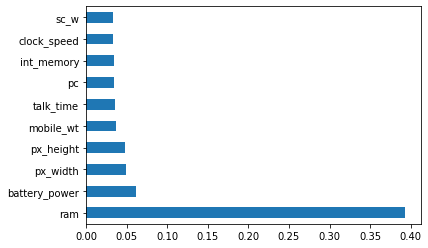

In [ ]:
#plot graph of feature importances for better visualization
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
X_filter = X.drop(X.columns.difference(feature_importances.nlargest(10).index), axis=1)
X_filter.head(10)

,battery_power,clock_speed,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_w,talk_time
0,842,2.2,7,188,2,20,756,2549,7,19
1,1021,0.5,53,136,6,905,1988,2631,3,7
2,563,0.5,41,145,6,1263,1716,2603,2,9
3,615,2.5,10,131,9,1216,1786,2769,8,11
4,1821,1.2,44,141,14,1208,1212,1411,2,15
5,1859,0.5,22,164,7,1004,1654,1067,1,10
6,1821,1.7,10,139,10,381,1018,3220,8,18
7,1954,0.5,24,187,0,512,1149,700,3,5
8,1445,0.5,53,174,14,386,836,1099,1,20
9,509,0.6,9,93,15,1137,1224,513,10,12


## 2. Wrapper Method:

A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. This is an iterative and computationally expensive process but it is more accurate than the filter method.
There are different wrapper methods such as **Backward Elimination**, **Forward Selection**, **Bidirectional Elimination** and **Recursive Feature Elimination (RFE)**. We will discuss **Backward Elimination** and **RFE** here.

### 2.1. Backward Elimination
As the name suggest, we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range.

The performance metric used here to evaluate feature performance is <font color='red'>$p$-value</font>. If the $p$-value is <font color='red'>**above**</font> 0.05 then we remove the feature, else we keep it.

We will first run one iteration here just to get an idea of the concept and then we will run the same code in a loop, which will give the final set of features. Here we are using OLS model which stands for “Ordinary Least Squares”. This model is used for performing linear regression.

In [ ]:
#Loading the dataset
boston_data = load_boston() # x is an object of sklearn.utils.Bunch, we will convert it into a common dataframe
type(boston_data)

sklearn.utils.Bunch

In [ ]:
df = pd.DataFrame(boston_data.data, columns = boston_data.feature_names) # create a dataframe object, called "df", by copying the .data members to it.
df["MEDV"] = boston_data.target # We then copy the .target member for a supervised problem to it.
X = df.drop("MEDV",1)   #Feature Matrix
y = df["MEDV"]          #Target Variable
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### **Statsmodels**

[https://www.statsmodels.org/stable/index.html](https://www.statsmodels.org/stable/index.html)

In [ ]:
import statsmodels.api as sm

pd.options.display.float_format = '{:,.6f}'.format
#%precision %.6f

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model (regression model )
model = sm.OLS(y,X_1).fit()
model.pvalues.to_frame()

,0
const,0.000000
CRIM,0.001087
ZN,0.000778
INDUS,0.738288
CHAS,0.001925
NOX,0.000004
RM,0.000000
AGE,0.958229
DIS,0.000000
RAD,0.000005


As we can see that the variable ‘AGE’ has highest $p$-value of 0.9582293 which is greater than 0.05. Hence we will remove this feature and build the model once again. This is an iterative process and can be performed at once with the help of loop. This approach is implemented below, which would give the final set of variables which are CRIM, ZN, CHAS, NOX, RM, DIS, RAD, TAX, PTRATIO, B and LSTAT

In [ ]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max) #remove the feature with the p-value greater than 0.05, i.e., AGE and INDUS
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


### 2.2 RFE (Recursive Feature Elimination)

The [Recursive Feature Elimination (RFE)](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html) method works by recursively removing attributes and building a model on those attributes that remain. It uses <font color='red'>**accuracy**</font> metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input. It then gives the ranking of all the variables, 1 being most important. It also gives its support, True being relevant feature and False being irrelevant feature.

In [ ]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, n_features_to_select=7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True False  True  True False  True False
  True]
[2 4 3 1 1 1 7 1 1 5 1 6 1]


Here we took LinearRegression model with 7 features and RFE gave feature ranking as above, but the selection of number ‘7’ was random. Now we need to find the optimum number of features, for which the accuracy is the highest. We do that by using loop starting with 1 feature and going up to 13. We then take the one for which the accuracy is highest.

In [ ]:
#no of features
nof_list=np.arange(1,13)
high_score=0
#Variable to store the optimum features
nof=0
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.663581


As seen from above code, the optimum number of features is 10. We now feed 10 as number of features to RFE and get the final set of features given by RFE method, as follows:

In [ ]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)
#Fitting the data to model
model.fit(X_rfe,y)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO',
       'LSTAT'],
      dtype='object')


### 2.3 Feature selection using **SelectFromModel** (Sklearn)

The features are considered unimportant and removed if the corresponding importance of the feature values are below the provided threshold parameter. Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument. Available heuristics are “mean”, “median” and float multiples of these like “0.1*mean”. In combination with the threshold criteria, one can use the max_features parameter to set a limit on the number of features to select.

[SelectFromModel](https://scikit-learn.org/stable/modules/feature_selection.html#select-from-model)

In [ ]:
# LassoCV (Tips to select feature)
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel as sfm
feature_names = list(df.columns)

clf = LassoCV().fit(X, y)
importance = np.abs(clf.coef_)
print(importance)
print(importance.argsort())
print(importance.argsort()[-3])

idx_third = importance.argsort()[-3]
threshold = importance[idx_third]-0.01 #Features whose importance is greater or equal are kept while the others are discarded.
idx_features = (-importance).argsort()[:20]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

sfm = sfm(clf, threshold=threshold, prefit=True)

print('Threshold: {}'.format(threshold))
print('Original shape: {}'.format(X.shape))
X_new = sfm.transform(X)
print('New shape: {}'.format(X_new.shape))

[0.07426626 0.04945448 0.         0.         0.         1.804385
 0.01133345 0.81324404 0.27228399 0.01542465 0.74287183 0.00892587
 0.70365352]
[ 2  3  4 11  6  9  1  0  8 12 10  7  5]
10
Selected features: ['RM' 'DIS' 'PTRATIO' 'LSTAT' 'RAD' 'CRIM' 'ZN' 'TAX' 'AGE' 'B' 'INDUS'
 'CHAS' 'NOX']
Threshold: 0.7328718264855946
Original shape: (506, 13)
New shape: (506, 3)


## 3. Embedded Method
Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [ ]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702444


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

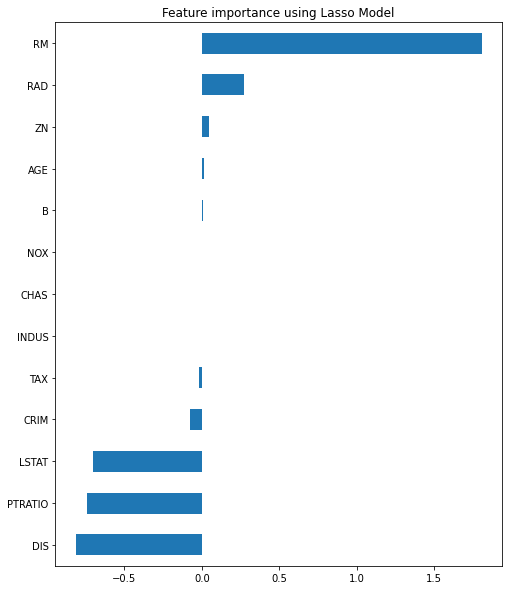

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

Here Lasso model has taken all the features except NOX, CHAS and INDUS.

## Conclusion:
We saw how to select features using multiple methods for Numeric Data and compared their results. Now there arises a confusion of which method to choose in what situation. Following points will help you make this decision.

1. Filter method is less accurate. It is great while doing exploratory data analysis (EDA), it can also be used for checking multi co-linearity in data.
2. Wrapper and Embedded methods give more accurate results but as they are computationally expensive, these method are suited when you have lesser features (~20).
